In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import nltk
warnings.filterwarnings('ignore')

In [2]:
# !pip install nltk

In [3]:

nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10054] An existing connection was forcibly closed by
[nltk_data]     the remote host>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\umesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
data=pd.read_json("Sarcasm_Headlines_Dataset.json",lines=True)
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [5]:
data

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [6]:
data['headline']

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
26704                 american politics in moral free-fall
26705                              america's best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [8]:
data.count()

article_link    26709
headline        26709
is_sarcastic    26709
dtype: int64

In [9]:
data.isnull().sum()

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [10]:
data.drop('article_link',axis=1)

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0
...,...,...
26704,american politics in moral free-fall,0
26705,america's best 20 hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0


In [11]:
# !pip install wordcloud

In [12]:
from wordcloud import WordCloud

<function matplotlib.pyplot.show(close=None, block=None)>

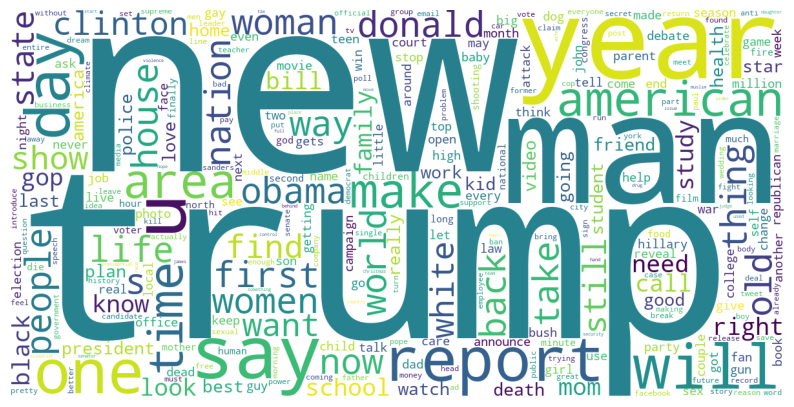

In [13]:
text=" ".join(i for i in data.headline)

wc = WordCloud(background_color = "white",
               width = 1200,
               height = 600,
               contour_width = 0,
               contour_color = "red",
               max_words = 300,
               scale = 1,
               collocations = False,
               repeat = True,
               min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [10, 10])
plt.imshow(wc)
plt.axis("off")
plt.show

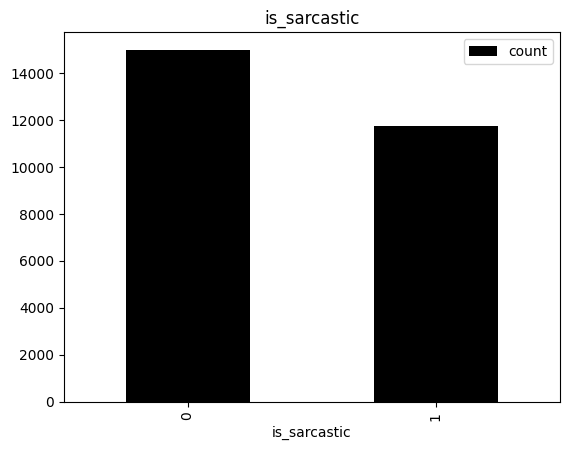

In [14]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
data['is_sarcastic'].value_counts().plot(kind='bar',color='black')
ax.legend(loc='best')
plt.title('is_sarcastic');

In [15]:
data["headline"].value_counts()

headline
sunday roundup                                                             10
the 20 funniest tweets from women this week                                10
'no way to prevent this,' says only nation where this regularly happens     8
the funniest tweets from parents this week                                  6
the funniest tweets from women this week                                    4
                                                                           ..
health inspector repulsed by restaurant's customers                         1
7 ways stand-up comedy can teach us to effectively motivate others          1
man's dream to get drunk in an a-frame finally realized                     1
eager understudy beginning to think john lithgow impervious to disease      1
gourmet gifts for the foodie 2014                                           1
Name: count, Length: 26602, dtype: int64

In [16]:
data['is_sarcastic'].value_counts()

is_sarcastic
0    14985
1    11724
Name: count, dtype: int64

In [17]:
import re
sentence_list=[]
for i in data['headline']:
    article_text=re.sub(r'\[[0-9]*\]', ' ', i)
    article_text = re.sub(r'\s+', ' ', article_text)
    formatted_article_text = re.sub('[^a-zA-Z]', ' ',article_text )
    formatted_article_text = re.sub(r'\s+', ' ',formatted_article_text)
    sentence_list.append(nltk.sent_tokenize(article_text)[0])
print(type(sentence_list[0]))
print(sentence_list) 

<class 'str'>
["former versace store clerk sues over secret 'black code' for minority shoppers", "the 'roseanne' revival catches up to our thorny political mood, for better and worse", "mom starting to fear son's web series closest thing she will have to grandchild", 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas', 'j.k. rowling wishes snape happy birthday in the most magical way', "advancing the world's women", 'the fascinating case for eating lab-grown meat', 'this ceo will send your kids to school, if you work for his company', 'top snake handler leaves sinking huckabee campaign', "friday's morning email: inside trump's presser for the ages", 'airline passengers tackle man who rushes cockpit in bomb threat', 'facebook reportedly working on healthcare features and apps', "north korea praises trump and urges us voters to reject 'dull hillary'", "actually, cnn's jeffrey lord has been 'indefensible' for a while", 'barcelona holds huge protest in su

In [18]:
data['char_txt']=pd.DataFrame(sentence_list)

In [19]:
data.head()

,article_link,headline,is_sarcastic,char_txt
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,former versace store clerk sues over secret 'b...
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,the 'roseanne' revival catches up to our thorn...
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,mom starting to fear son's web series closest ...
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,"boehner just wants wife to listen, not come up..."
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,j.k. rowling wishes snape happy birthday in th...


In [20]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [stemmer.stem(word) for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

data['cleaned_text'] = data['char_txt'].apply(preprocess_text)


In [21]:
data.head()

,article_link,headline,is_sarcastic,char_txt,cleaned_text
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,former versace store clerk sues over secret 'b...,former versac store clerk sue secret code mino...
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,the 'roseanne' revival catches up to our thorn...,reviv catch thorni polit mood better wors
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,mom starting to fear son's web series closest ...,mom start fear son web seri closest thing gran...
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,"boehner just wants wife to listen, not come up...",boehner want wife listen come altern idea
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,j.k. rowling wishes snape happy birthday in th...,rowl wish snape happi birthday magic way


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
labels = data['is_sarcastic']
sentences = data['cleaned_text']
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer()

In [23]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [24]:
X_test_tfidf

<5342x15100 sparse matrix of type '<class 'numpy.float64'>'
	with 33874 stored elements in Compressed Sparse Row format>

In [25]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [26]:
y_pred1 = model.predict(X_test_tfidf)

In [27]:
decision_tree_prediction=model.predict(X_test_tfidf)

In [28]:
print('Accuracy_score',accuracy_score(y_test,decision_tree_prediction))

Accuracy_score 0.7832272557094722


In [29]:
print(confusion_matrix(y_test, y_pred1))

[[2572  424]
 [ 734 1612]]


In [39]:
headline=input()

 bloomberg's program to build better cities just got bigger


In [40]:
user_input=vectorizer.transform([headline])
prediction=model.predict(user_input)
if prediction==1:
    print("Sarcastic")
else:
    print("Not sarcastic")

Not sarcastic


In [41]:
import pickle

In [42]:
with open("sarcasm.pkl",'wb') as f:
    pickle.dump(model,f)

In [43]:
with open("sarcasm_vect.pkl",'wb') as f:
    pickle.dump(vectorizer,f)